# Homework 6

TFCB 2021

Due date: Nov 23, 2021 1PM

In this homework, we will work through a series of manipulations to analyze a published deep sequencing
dataset using `tidyverse` functions.

In the process, we will learn some new functions in `tidyverse` and apply
them to our data analysis.

For more information about the data used in this homework, see
[this page](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE89183).


In [ ]:
library(tidyverse)

## Problem 1

**10 points**

For each of the following functions, provide a <100 character description
(in your own words) and a URL reference.

1. `!`
2. `is.na`
3. `is.numeric`
4. `anti_join`
5. `desc`
6. `dplyr::slice`
7. `dplyr::across`


## Problem 2

**10 points**

Add a comment above each code line below explaining what the code line does and/or why
that code line is necessary.

Keep each comment to less than 2 lines per line of code and < 80 chars per line.

In [ ]:
annotations <- read_tsv("ftp://ftp.ebi.ac.uk/pub/databases/genenames/new/tsv/locus_groups/protein-coding_gene.txt") %>%
  select(ensembl_gene_id, symbol, name, gene_group, ccds_id) %>%
  filter(!is.na(ccds_id)) %>%
  print()

In [5]:
data <- read_tsv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE89nnn/GSE89183/suppl/GSE89183_Counts.txt.gz") %>%
  rename(ensembl_gene_id = `ENSEMBL gene`) %>%
  print()


── Column specification ────────────────────────────────────────────────────────
cols(
  `ENSEMBL gene` = col_character(),
  CD34_shTSR2_RNA_1 = col_double(),
  CD34_shTSR2_RNA_2 = col_double(),
  CD34_shRPL5_RNA_1 = col_double(),
  CD34_shRPL5_RNA_2 = col_double(),
  CD34_shRPL5_RPF_1 = col_double(),
  CD34_shRPL5_RPF_2 = col_double(),
  CD34_shRPS19_RNA_1 = col_double(),
  CD34_shRPS19_RNA_2 = col_double(),
  CD34_shRPS19_RPF_1 = col_double(),
  CD34_shRPS19_RPF_2 = col_double(),
  CD34_shLuc_RNA_1 = col_double(),
  CD34_shLuc_RNA_2 = col_double(),
  CD34_shLuc_RPF_1 = col_double(),
  CD34_shLuc_RPF_2 = col_double()
)




# A tibble: 63,677 x 15
   ensembl_gene_id CD34_shTSR2_RNA… CD34_shTSR2_RNA… CD34_shRPL5_RNA…
   <chr>                      <dbl>            <dbl>            <dbl>
 1 ENSG00000000003               48               56               40
 2 ENSG00000000005                0                2                0
 3 ENSG00000000419              880              744             1116
 4 ENSG00000000457              124              113              149
 5 ENSG00000000460              249              262              289
 6 ENSG00000000938               89               64              204
 7 ENSG00000000971              106               86              241
 8 ENSG00000001036              897              613             1487
 9 ENSG00000001084              965             1027             1036
10 ENSG00000001167              721              835              498
# … with 63,667 more rows, and 11 more variables: CD34_shRPL5_RNA_2 <dbl>,
#   CD34_shRPL5_RPF_1 <dbl>, CD34_shRPL5_RPF_2 <dbl>, CD34_sh

## Problem 3

**10 points**

Using the code below:

1. Convert both axes to `log10` instead of linear scales.
2. Show axis tick labels as 10^0^, 10^1^, 10^2^,10^3^, 10^4^, 10^5^ for both axes.
3. There are too many points overlapping in certain regions. Use a different
`geom_` function to convey to your reader how many overlapping points are present
in each region.

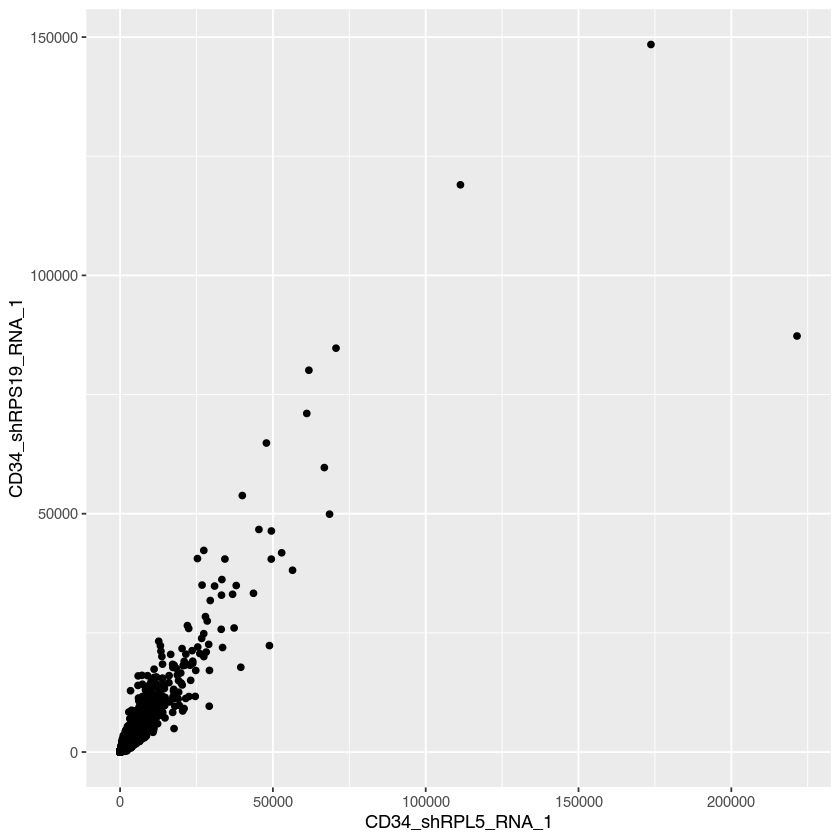

In [6]:
data %>%
  select(CD34_shRPL5_RNA_1, CD34_shRPS19_RNA_1) %>%
  ggplot(aes(x = CD34_shRPL5_RNA_1, y = CD34_shRPS19_RNA_1)) +
  geom_point()

**In problems 4 through 6, assign the result of your operation back to the `data`
variable.**

## Problem 4

**10 points**

Write a code cell to select the following columns from the `data` variable you created above and reassign back to `data`.

Columns to select: `ensembl_gene_id`, columns that have either `RPL5`, `RPS19`, or `Luc` in their name.

Instead of listing every column, use [`matches`](https://tidyselect.r-lib.org/reference/starts_with.html) and a succinct [regular expression](https://stringr.tidyverse.org/articles/regular-expressions.html) to select the above columns.

## Problem 5

**10 points**

Write a code cell to filter the result from Problem 4 to include only rows where each of the 12 numerical columns you selected has 50 counts or more  and reassign back to `data`.
This is a simple way to avoid genes that have very low counts.

You might be tempted to do this step separately for each of the 12 columns, but instead use the `across` function you learned above or the `pivot_longer` function from the class (either way is fine).

## Problem 6

**10 points**

Write a code cell to divide each of the 12 numerical columns by the
corresponding median value for each column
and reassign back to `data`. This median normalization is typically done in
high-throughput experiments after filtering
to normalize for sample-to-sample difference in read depth.

Again, you can write lot less code if you use the `mutate` and `across` function
you learned above.


## Problem 7

**10 points**

After we do the above filtering and median-normalization, let us calculate
translation efficiency as the average ratio of the RPF and RNA reads for each
treatment condition. Then we calculate how this translation efficiency changes
between target (`rpl5` and `rps19`) and control (`luc`) shRNAs.

The code implementing the above steps is shown below, but it has a few
errors. Correct them.


In [ ]:
lfc <- data %>%
  mutate(mean_rpl5_te = ((CD34_shRPL5_RPF_1 + CD34_shRPL5_RPF_2) /
                            (CD34_shRPL5_RNA_1 + CD34_shRPL5_RNA_2)) %>%
  mutate(mean_rps19_te = ((CD34_shRPS19_RPF_1 + CD34_shRPS19_RPF_2) /
                            (CD34_shRPS19_RNA_1 + CD34_shRPS19_RNA_2)) %>%
  mutate(mean_shluc_te = ((CD34_shLuc_RPF_1 + CD34_shLuc_RPF_2) /
                            (CD34_shLuc_RNA_1 + CD34_shLuc_RNA2)) %>%
  select(ensembl_gene_id, mean_rpl5_te, mean_rps19_te) %>%
  mutate(lfc_te_rpl5 == log2(mean_rpl5_te / mean_shluc_te),
         lfc_te_rps19 == log2(mean_rps19_te / mean_shluc_te)) %>%
  print()

## Problem 8

**10 points**

Write code that will create a new dataframe called `mean_lfc` from `lfc`
containing a new column called `avg_lfc`.
`avg_lfc` should be the average of the log2 fold-change in TE (`lfc_te`) upon
knockdown of RPL5 and RPS19.

Then select only the gene id column and the new column that you just created
(this will be your new dataframe `mean_lfc`).



## Problem 9

**10 points**

Write code to join the `mean_lfc` dataframe with the `annotations` dataframe created
at the top of the document and assign back to `mean_lfc`.


## Problem 10

**10 points**

1. Write code to select only the bottom 10 genes with the lowest `avg_lfc` and display the gene `symbol`, gene `name` and `avg_lfc` for these genes.
2. Create a figure using `ggplot2` to visualize these results.

Write a few sentences to justify the choices you made when creating your figure.